In [1]:

import numpy as np

points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])

from scipy.spatial import Delaunay

tri = Delaunay(points)

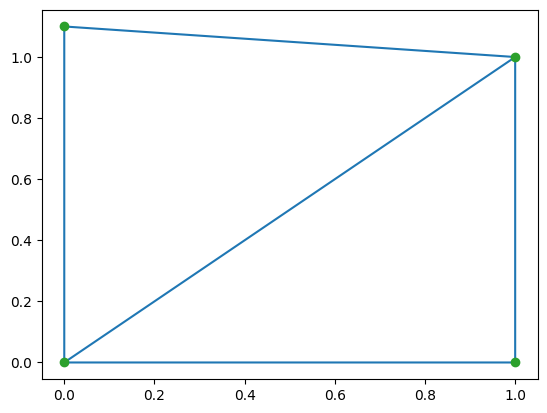

In [2]:
import matplotlib.pyplot as plt

plt.triplot(points[:,0], points[:,1], tri.simplices)

plt.plot(points[:,0], points[:,1], 'o')

plt.show()

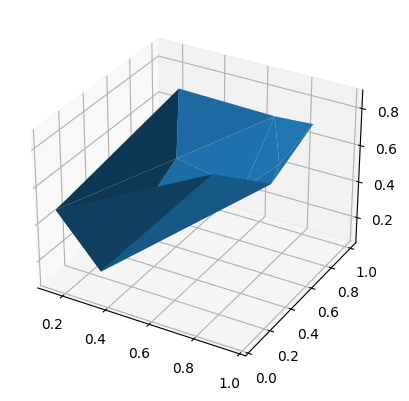

In [3]:
import numpy as np
from scipy.spatial import Delaunay

# generate a set of 3D points
points = np.random.rand(10, 3)

# compute the Delaunay triangulation
tri = Delaunay(points)

# visualize the result
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(points[:,0], points[:,1], points[:,2], triangles=tri.simplices)
plt.show()

In [104]:
import numpy as np
from scipy.spatial import Voronoi

def delaunay_triangulation(points):
    # compute the Voronoi diagram
    vor = Voronoi(points)
    print(vor.points)
    
    # identify the Delaunay simplices (i.e. the tetrahedra)
    simplices = vor.vertices[vor.ridge_vertices]
    print(simplices.shape())
    # remove any simplices that have infinite vertices
    is_finite = np.all(np.isfinite(simplices), axis=1)
    simplices = simplices[is_finite]

    # sort the vertices in each simplex to ensure consistent ordering
    simplices.sort(axis=1)

    # create a Simplex object to store the results
    class Simplex:
        def __init__(self, vertices):
            self.vertices = vertices

    return [Simplex(vertices) for vertices in simplices]

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay

# define the number of points to generate
npoints = 25

# generate a set of 3D points on the surface of a sphere
u = np.random.uniform(0, 2*np.pi, npoints)
v = np.random.uniform(0, np.pi, npoints)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
#points = np.vstack([x.flatten(), y.flatten(), z.flatten()]).T

points = [[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 0], [0.5, 0.5, 1]]
# compute the Delaunay triangulation using the delaunay_triangulation function
tri = delaunay_triangulation(points)
#tri = Delaunay(points)
# plot the sphere
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf( tri)
plt.show()

[[0.  0.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  1.  0. ]
 [0.5 0.5 1. ]]


TypeError: 'tuple' object is not callable

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import ConvexHull, Voronoi

# Define your input points
#points = [[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 0], [0.5, 0.5, 1]]
points = np.random.rand(10, 3)
# Convert points to a numpy array
points = np.array(points)
# Compute the convex hull
hull = ConvexHull(points)

# Check if the points are coplanar
if len(hull.simplices) < len(points):
    print("Input points are coplanar")
else:
    # Compute the Voronoi diagram
    vor = Voronoi(points)
    # Get the simplices
    valid_ridge_vertices = []
    for ridge in vor.ridge_vertices:
        if all(i >= 0 for i in ridge):
            valid_ridge_vertices.append(ridge)
            print(valid_ridge_vertices)
    simplices = vor.vertices[vor.ridge_vertices].reshape(-1, 4)
    print(simplices)
    
# Plot the simplices
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for simplex in simplices:
    vertices = vor.vertices[simplex]
    print(vertices)
    tri = Poly3DCollection([vertices])
    tri.set_color('b')
    tri.set_edgecolor('k')
    ax.add_collection3d(tri)

# Add the input points to the plot
ax.scatter(points[:,0], points[:,1], points[:,2], c='r', s=50)

# Set the axis limits and labels
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


[[2, 4, 10, 8]]
[[2, 4, 10, 8], [2, 9, 8]]
[[2, 4, 10, 8], [2, 9, 8], [0, 1, 6, 5]]
[[2, 4, 10, 8], [2, 9, 8], [0, 1, 6, 5], [1, 6, 4, 2]]
[[2, 4, 10, 8], [2, 9, 8], [0, 1, 6, 5], [1, 6, 4, 2], [3, 4, 6, 5]]
[[2, 4, 10, 8], [2, 9, 8], [0, 1, 6, 5], [1, 6, 4, 2], [3, 4, 6, 5], [4, 10, 13, 11, 7, 6]]
[[2, 4, 10, 8], [2, 9, 8], [0, 1, 6, 5], [1, 6, 4, 2], [3, 4, 6, 5], [4, 10, 13, 11, 7, 6], [5, 6, 7]]
[[2, 4, 10, 8], [2, 9, 8], [0, 1, 6, 5], [1, 6, 4, 2], [3, 4, 6, 5], [4, 10, 13, 11, 7, 6], [5, 6, 7], [7, 12, 11]]
[[2, 4, 10, 8], [2, 9, 8], [0, 1, 6, 5], [1, 6, 4, 2], [3, 4, 6, 5], [4, 10, 13, 11, 7, 6], [5, 6, 7], [7, 12, 11], [1, 14, 15, 8, 2]]


C:\Users\Patrick Gardocki\AppData\Local\Temp\ipykernel_17572\1402839358.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  simplices = vor.vertices[vor.ridge_vertices].reshape(-1, 4)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices